In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.units import units

In [2]:
lath = 30. + np.arange(0,75)*.25
lonh = -125. + np.arange(0,100)*.25
tlon = lonh[-1]-lonh[0]
tlat = lath[-1]-lath[0]
print(tlat,tlon)
orig_x = -110.
orig_y = 40.

18.5 24.75


In [3]:
xh,yh = np.meshgrid(lonh,lath)
print(np.shape(xh),np.shape(yh))
#print(yh[:,0])

(75, 100) (75, 100)


In [4]:
#plot as lambert conformal
mapcrs = ccrs.LambertConformal(central_longitude=-110,
                               central_latitude=45,
                               standard_parallels=(30, 60))
# Set up the projection of the data
datacrs = ccrs.PlateCarree()

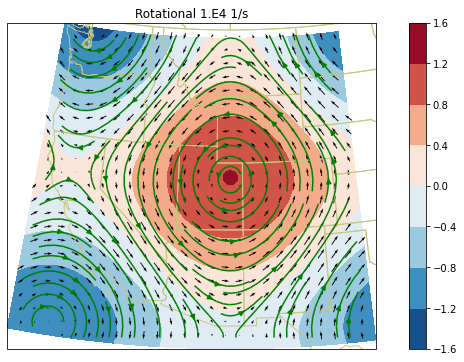

In [5]:
#compute wind for pure vorticity
u = -20 * np.sin(2*np.pi*(yh-orig_y)/tlat)
v = 20 * np.sin(2*np.pi*(xh-orig_x)/tlon)
u = u * units('m/s')
v = v * units('m/s')
dx, dy = mpcalc.lat_lon_grid_deltas(xh,yh)
vor = mpcalc.vorticity(u,v,dx,dy)
vor = vor *1.E4
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
colormap = cm.get_cmap('RdBu_r')
cs1 = ax.contourf(xh,yh,vor,cmap=colormap,transform=datacrs)
ax.quiver(xh, yh, u.m, v.m, pivot='middle',
         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.set_title('Rotational 1.E4 1/s')
plt.savefig('../figs/vor.png')
plt.show()

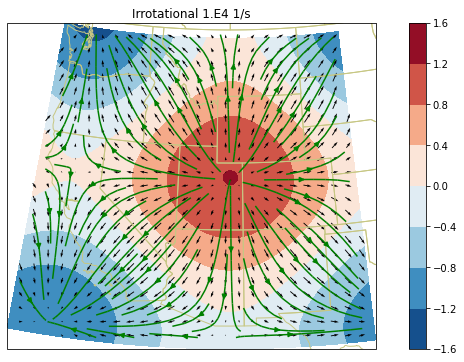

In [6]:
#compute wind for pure divergence
u = 20 * np.sin(2*np.pi*(xh-orig_x)/tlon)
v = 20 * np.sin(2*np.pi*(yh-orig_y)/tlat)
u = u * units('m/s')
v = v * units('m/s')
div = mpcalc.divergence(u,v,dx,dy)
div = div *1.E4
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
colormap = cm.get_cmap('RdBu_r')
cs1 = ax.contourf(xh,yh,div,cmap=colormap,transform=datacrs)
ax.quiver(xh, yh, u.m, v.m, pivot='middle',
         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
#ax.clabel(cs1,fmt='%0.1f',inline=True)
b=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.set_title('Irrotational 1.E4 1/s')
plt.savefig('../figs/div.png')
plt.show()

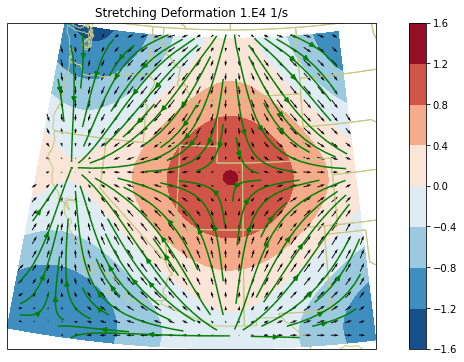

In [7]:
#compute wind for pure stretching deformation
u = 20 * np.sin(2*np.pi*(xh-orig_x)/tlon)
v = -20 * np.sin(2*np.pi*(yh-orig_y)/tlat)
u = u * units('m/s')
v = v * units('m/s')
stre = mpcalc.stretching_deformation(u,v,dx,dy)
stre = stre*1.E4
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
colormap = cm.get_cmap('RdBu_r')
cs1 = ax.contourf(xh,yh,stre,cmap=colormap,transform=datacrs)
ax.quiver(xh, yh, u.m, v.m, pivot='middle',
         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.set_title('Stretching Deformation 1.E4 1/s')
plt.savefig('../figs/stre.png')
plt.show()

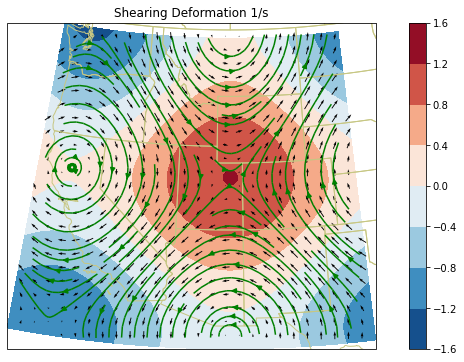

In [8]:
#compute wind for pure shearing deformation
u = 20 * np.sin(2*np.pi*(yh-orig_y)/tlat)
v = 20 * np.sin(2*np.pi*(xh-orig_x)/tlon)
u = u * units('m/s')
v = v * units('m/s')
she = mpcalc.shearing_deformation(u,v,dx,dy)
she = she * 1.E4
fig,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': mapcrs})
colormap = cm.get_cmap('RdBu_r')
cs1 = ax.contourf(xh,yh,she,cmap=colormap,transform=datacrs)
ax.quiver(xh, yh, u.m, v.m, pivot='middle',
         color='black', regrid_shape=25, transform=datacrs)
ax.streamplot(xh,yh, u.m,v.m,transform=datacrs,arrowsize=1,color='green')
#ax.clabel(cs1,fmt='%0.1f',inline=True)
cb=plt.colorbar(cs1)
ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='#c7c783', zorder=1)
ax.set_title('Shearing Deformation 1/s')
plt.savefig('../figs/shear.png')
plt.show()